Now that you've gotten a solid introduction to Python and SQL, its time to start putting those skills to work and using them to assemble a dataset. 

<b>Your goal is to choose an API and programmatically use it to populate a database. From there, you will then begin to explore the dataset and uncover initial insights.</b>

In [2]:
f = open("C:/Users/nwhite/Documents/git/yelp.api_key.txt", "r") 
api_key = f.readline()

In [5]:
import requests
import json
import time

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# Create a SQL database with multiple tables ## use sql queries in panda instead

import sqlite3
conn = sqlite3.connect('yelp_database.db')
c = conn.cursor()


In [212]:
# Write a function to acquire/clean data programmatically 

In [308]:
location = 'Manhattan NY'
search_limit = 50
categories = 'Restaurants'


def retrieve_results(location, categories, search_limit, api_key, offset=0):


    url = 'https://api.yelp.com/v3/businesses/search'

    headers =  {
            'Authorization': 'Bearer {}'.format(api_key),
        }
    
    url_params = {
                    'location': location.replace(' ', '+'),
                    'categories': categories.replace(' ', '+'),
                    'offset': offset,
                    'limit': search_limit

                }
    response1 = requests.get(url, headers=headers, params=url_params)
    
    return response1

def batch_retrieve(location, categories, search_limit, api_key):
    dfs = []
    results_count = 0
    
    #First Request
    response1 = retrieve_results(location, categories, search_limit, api_key)
    
    #Retrieve Total Matches
    total = 1000
    #results_count += len()
    
    temp_df = pd.DataFrame.from_dict(response1.json()['businesses'])
    results_count += len(temp_df.index)
    dfs.append(temp_df)
    
    while results_count < total:
        response1 = retrieve_results(location, categories, search_limit, api_key, offset=results_count)
        temp_df = pd.DataFrame.from_dict(response1.json()['businesses'])
        results_count += len(temp_df.index)
        dfs.append(temp_df)
        time.sleep(5)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df

In [309]:
df = batch_retrieve(location, categories, search_limit, api_key)
print(len(df))
df.head()

1000


,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,levain-bakery-new-york,"[{'alias': 'bakeries', 'title': 'Bakeries'}]","{'latitude': 40.7799404643263, 'longitude': -7...",(212) 874-6080,2198.507677,H4jJ7XB3CetIr1pg56CczQ,https://s3-media2.fl.yelpcdn.com/bphoto/9uUdfb...,False,"{'address1': '167 W 74th St', 'address2': '', ...",Levain Bakery,+12128746080,$$,4.5,7326,[],https://www.yelp.com/biz/levain-bakery-new-yor...
1,the-halal-guys-new-york-2,"[{'alias': 'foodstands', 'title': 'Food Stands...","{'latitude': 40.7617559582706, 'longitude': -7...",,182.040271,xEnNFXtMLDF5kZDxfaCJgA,https://s3-media1.fl.yelpcdn.com/bphoto/24lb-V...,False,"{'address1': 'W 53rd St 6th Ave', 'address2': ...",The Halal Guys,,$,4.0,9118,[],https://www.yelp.com/biz/the-halal-guys-new-yo...
2,ippudo-ny-new-york-7,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 40.73092, 'longitude': -73.99015}",,3402.437825,44SY464xDHbvOcjDzRbKkQ,https://s3-media1.fl.yelpcdn.com/bphoto/zF3Egq...,False,"{'address1': '65 4th Ave', 'address2': '', 'ad...",Ippudo NY,,$$,4.0,9654,"[pickup, delivery]",https://www.yelp.com/biz/ippudo-ny-new-york-7?...
3,the-metropolitan-museum-of-art-new-york-3,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]","{'latitude': 40.779254271604, 'longitude': -73...",(212) 535-7710,2492.276496,jVncyqXwlx_D9f2xZn05tg,https://s3-media1.fl.yelpcdn.com/bphoto/IYGL2y...,False,"{'address1': '1000 5th Ave', 'address2': '', '...",The Metropolitan Museum of Art,+12125357710,NaN,4.5,2664,[],https://www.yelp.com/biz/the-metropolitan-muse...
4,central-park-new-york,"[{'alias': 'parks', 'title': 'Parks'}]","{'latitude': 40.782418740809, 'longitude': -73...",(212) 310-6600,2697.302511,xOw4aafJRji9XomGunlvcQ,https://s3-media2.fl.yelpcdn.com/bphoto/a_T1R7...,False,"{'address1': '14 E 60th St', 'address2': '', '...",Central Park,+12123106600,NaN,5.0,2273,[],https://www.yelp.com/biz/central-park-new-york...


In [313]:
# By exploring the dataset, I find there are 52 restaurants with the same name.
len(df['name'].unique())

948

In [339]:
# I expand my view to analyze more rows in the dataframe
pd.set_option('display.max_rows', 50)

In [360]:
# I add a column to sort by the duplicate name values and discover these are actually unique restaurants with the same name
df['duplicate_names'] = df['name'].duplicated()
df.sort_values('duplicate_names', ascending=False)

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,duplicate_names
500,la-colombe-coffee-new-york-4,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]","{'latitude': 40.728221, 'longitude': -73.993165}",(212) 677-5834,3765.961055,YhOmfXTPu_QRNT3azAu6wA,https://s3-media2.fl.yelpcdn.com/bphoto/AMERgg...,False,"{'address1': '400 Lafayette St', 'address2': '...",La Colombe Coffee,+12126775834,$$,4.5,542,[],https://www.yelp.com/biz/la-colombe-coffee-new...,True
675,joes-pizza-new-york-148,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 40.7545841255557, 'longitude': -7...",(646) 559-4878,951.322011,KEEXuHCYhsQJ-zpJhu98bA,https://s3-media3.fl.yelpcdn.com/bphoto/5P5i2Q...,False,"{'address1': '1435 Broadway', 'address2': '', ...",Joe's Pizza,+16465594878,$,4.0,514,"[delivery, pickup]",https://www.yelp.com/biz/joes-pizza-new-york-1...,True
331,gyu-kaku-japanese-bbq-new-york-3,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.75908, 'longitude': -73.98989}",(646) 692-9115,954.618542,ONQRhDuWv0e9R5xOiI7YAA,https://s3-media1.fl.yelpcdn.com/bphoto/nLuORV...,False,"{'address1': '321 W 44th St', 'address2': 'Uni...",Gyu-Kaku Japanese BBQ,+16466929115,$$,4.0,1104,[],https://www.yelp.com/biz/gyu-kaku-japanese-bbq...,True
923,the-kati-roll-company-new-york,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...","{'latitude': 40.729634, 'longitude': -74.000964}",(212) 420-6497,3891.559379,kB3QyyhHFVyhGgp35Rnuew,https://s3-media3.fl.yelpcdn.com/bphoto/cuJjb4...,False,"{'address1': '99 MacDougal St', 'address2': ''...",The Kati Roll Company,+12124206497,$,4.0,834,"[pickup, delivery]",https://www.yelp.com/biz/the-kati-roll-company...,True
689,lady-m-cake-boutique-new-york-3,"[{'alias': 'desserts', 'title': 'Desserts'}, {...","{'latitude': 40.752722, 'longitude': -73.9836459}",(212) 452-2222,939.156826,L1eRvGuRW8gL_auRr8_Xog,https://s3-media3.fl.yelpcdn.com/bphoto/2IwZ-J...,False,"{'address1': '36 W 40th St', 'address2': '', '...",Lady M Cake Boutique,+12124522222,$$,3.5,1100,[],https://www.yelp.com/biz/lady-m-cake-boutique-...,True
926,friedmans-new-york-57,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 40.755311, 'longitude': -73.998389}",(212) 268-1100,1761.684328,zUv1BNm_a9-3DkxrCG3tng,https://s3-media1.fl.yelpcdn.com/bphoto/qkTS6z...,False,"{'address1': '450 10th Ave', 'address2': '', '...",Friedman's,+12122681100,$$,4.0,501,"[pickup, delivery]",https://www.yelp.com/biz/friedmans-new-york-57...,True
575,shake-shack-new-york-11,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...","{'latitude': 40.715283, 'longitude': -74.014799}",(646) 545-4600,5857.894492,ySbVtwa_PHQIlnKVMNSNeQ,https://s3-media1.fl.yelpcdn.com/bphoto/vuK8-W...,False,"{'address1': '215 Murray St', 'address2': '', ...",Shake Shack,+16465454600,$$,4.0,899,[delivery],https://www.yelp.com/biz/shake-shack-new-york-...,True
319,gyu-kaku-japanese-bbq-new-york-2,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.75537, 'longitude': -73.97054}",(212) 702-8816,852.091314,dtk1Cstz5MHr-B1AOM_nXA,https://s3-media1.fl.yelpcdn.com/bphoto/mILeoo...,False,"{'address1': '805 3rd Ave', 'address2': '2nd F...",Gyu-Kaku Japanese BBQ,+12127028816,$$$,4.0,1084,[],https://www.yelp.com/biz/gyu-kaku-japanese-bbq...,True
317,the-mermaid-inn-new-york-2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 40.7887398925594, 'longitude': -7...",(212) 799-7400,3190.121983,vQcK7BH6maW9dAZWJOuW3Q,https://s3-media3.fl.yelpcdn.com/bphoto/6BfALG...,False,"{'address1': '570 Amsterdam Ave', 'address2': ...",The Mermaid Inn,+12127997400,$$,4.0,994,[],https://www.yelp.com/biz/the-mermaid-inn-new-y...,True
213,beyond-sushi-new-york-4,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...","{'latitude': 40.76331, 'longitude': -73.97717}",(646) 964-5097,359.107225,TcuWyuZAORVnQBPCMNbTgw,https://s3-media2.fl.yelpcdn.com/bphoto/HME4a6...,False,"{'address1': '62 W 56th St', 'a

In [342]:
# I confirm this by counting the unique aliases
len(df['alias'].unique())

1000

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
alias            1000 non-null object
categories       1000 non-null object
coordinates      1000 non-null object
display_phone    1000 non-null object
distance         1000 non-null float64
id               1000 non-null object
image_url        1000 non-null object
is_closed        1000 non-null bool
location         1000 non-null object
name             1000 non-null object
phone            1000 non-null object
price            974 non-null object
rating           1000 non-null float64
review_count     1000 non-null int64
transactions     1000 non-null object
url              1000 non-null object
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 118.2+ KB


In [365]:
df.loc[:,"categories"]

0           [{'alias': 'bakeries', 'title': 'Bakeries'}]
1      [{'alias': 'foodstands', 'title': 'Food Stands...
2                 [{'alias': 'ramen', 'title': 'Ramen'}]
3      [{'alias': 'artmuseums', 'title': 'Art Museums'}]
4                 [{'alias': 'parks', 'title': 'Parks'}]
5      [{'alias': 'delis', 'title': 'Delis'}, {'alias...
6      [{'alias': 'coffee', 'title': 'Coffee & Tea'},...
7                 [{'alias': 'tacos', 'title': 'Tacos'}]
8      [{'alias': 'seafood', 'title': 'Seafood'}, {'a...
9      [{'alias': 'newamerican', 'title': 'American (...
10     [{'alias': 'parks', 'title': 'Parks'}, {'alias...
11     [{'alias': 'bagels', 'title': 'Bagels'}, {'ali...
12     [{'alias': 'french', 'title': 'French'}, {'ali...
13     [{'alias': 'burgers', 'title': 'Burgers'}, {'a...
14     [{'alias': 'bakeries', 'title': 'Bakeries'}, {...
15     [{'alias': 'thai', 'title': 'Thai'}, {'alias':...
16                [{'alias': 'ramen', 'title': 'Ramen'}]
17          [{'alias': 'steak',

In [311]:
type(df['categories'])

pandas.core.series.Series

In [369]:
df['categories'].value_counts()

[{'alias': 'italian', 'title': 'Italian'}]                                                                                                                                     27
[{'alias': 'ramen', 'title': 'Ramen'}]                                                                                                                                         16
[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}]                                                                                               13
[{'alias': 'coffee', 'title': 'Coffee & Tea'}]                                                                                                                                 12
[{'alias': 'newamerican', 'title': 'American (New)'}]                                                                                                                          12
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'sushi', 'title': 'Sushi Bars'}]                       

In [396]:
df['categories'].describe()

count                                           1000
unique                                           684
top       [{'alias': 'italian', 'title': 'Italian'}]
freq                                              27
Name: categories, dtype: object

In [161]:
data['total'] #A sample size of 1,000 out of 20,500 restaurants gives this analysis a margin of error of 3%

20500

In [204]:
first_50_businesses = data['businesses']

In [401]:
prices = df["price"].loc[:]
print(prices)

0        $$
1         $
2        $$
3       NaN
4       NaN
5        $$
6         $
7         $
8        $$
9      $$$$
10      NaN
11        $
12     $$$$
13       $$
14       $$
15       $$
16       $$
17      $$$
18       $$
19       $$
20     $$$$
21       $$
22      $$$
23       $$
24       $$
       ... 
975      $$
976      $$
977     $$$
978      $$
979     NaN
980      $$
981      $$
982       $
983     $$$
984     $$$
985      $$
986      $$
987     $$$
988       $
989      $$
990      $$
991      $$
992      $$
993      $$
994      $$
995       $
996      $$
997      $$
998     $$$
999      $$
Name: price, Length: 1000, dtype: object


In [ ]:
# Create visuals - 5+ - labels, colors, styles

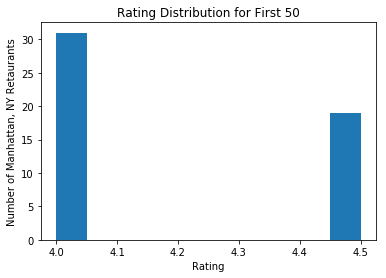

In [198]:
x = [first_50_ratings]

plt.hist(x, bins = 10)

plt.xlabel('Rating')
plt.ylabel('Number of Manhattan, NY Retaurants')
plt.title('Rating Distribution for First 50')
plt.show()

In [ ]:
# Coding style - comment appropriately, functional chunks

In [ ]:
# Define the problem and present an analysis 